### API:
API stands for Application Programming Interface. It's a set of rules and protocols that define how data is exchanged between software systems.     

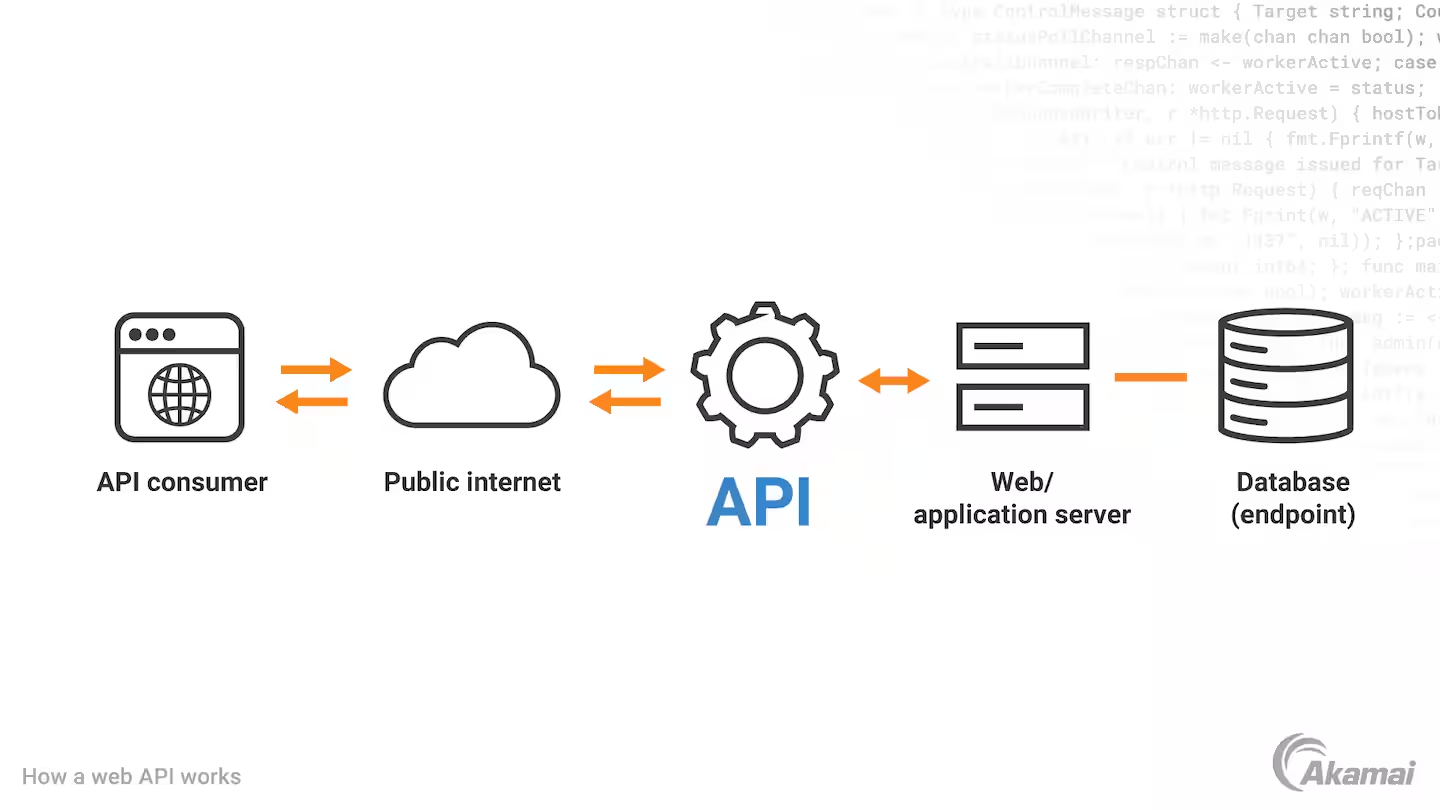

`How APIs work?`

APIs act as a contract between two applications, defining how they communicate with each other.     
APIs use requests and responses to allow applications to exchange data.     

`Types of APIs:`

- Public APIs: Also known as open APIs, these are available for anyone to use.    
- Partner APIs: These are external APIs that can only be used if there's a business relationship with the provider.    
- Internal APIs: Also known as private APIs, these are used within a company to share information between teams.    
- Composite APIs: These batch API requests into a single API call.     

`Examples of APIs:`

- Google Maps API: A widely used API    
- Twitter API: A widely used API    
- PayPal API: An API commonly used in online payment processing    
- Stripe API: An API commonly used in online payment processing    
- AI API: An API that allows developers to integrate AI capabilities into their applications    
## Fetching data from an API

- Install requests library

In [ ]:
! pip install requests

- import requests and pandas library

In [3]:
import requests
import pandas as pd

- define the API url from where the data is present

In [4]:
url = 'https://api.coincap.io/v2/assets'

- use get function to get the response from that API url

In [5]:
response = requests.get(url)

- If the response is 200, then it means the request was successful and the response body contains the data.

In [6]:
print(response)

<Response [200]>


- Converting response into json

In [7]:
data = response.json()
data

{'data': [{'id': 'bitcoin',
   'rank': '1',
   'symbol': 'BTC',
   'name': 'Bitcoin',
   'supply': '19814378.0000000000000000',
   'maxSupply': '21000000.0000000000000000',
   'marketCapUsd': '2091893947999.1867558337146450',
   'volumeUsd24Hr': '28825233634.7514849234614224',
   'priceUsd': '105574.5453124587991525',
   'changePercent24Hr': '3.1170510970017674',
   'vwap24Hr': '104347.0492745137877585',
   'explorer': 'https://blockchain.info/'},
  {'id': 'ethereum',
   'rank': '2',
   'symbol': 'ETH',
   'name': 'Ethereum',
   'supply': '120504818.3093081900000000',
   'maxSupply': None,
   'marketCapUsd': '410518040363.3924901585935782',
   'volumeUsd24Hr': '11699609177.9423157598175492',
   'priceUsd': '3406.6524984062211680',
   'changePercent24Hr': '5.8462366818524582',
   'vwap24Hr': '3282.2905560430174352',
   'explorer': 'https://etherscan.io/'},
  {'id': 'xrp',
   'rank': '3',
   'symbol': 'XRP',
   'name': 'XRP',
   'supply': '57564441898.0000000000000000',
   'maxSupply': '

- normalizing the json response data to dataFrame using pandas..

In [13]:
df = pd.json_normalize(data) 

In [ ]:
df.sample() # nested data is present in the response

,data,timestamp
0,"[{'id': 'bitcoin', 'rank': '1', 'symbol': 'BTC...",1737710575963


In [19]:
# The string 'data' indicates the key 
# within the response_data JSON object that contains the nested data you wish to normalize.

df = pd.json_normalize(data,'data') 

In [21]:
df.sample(3)

,id,rank,symbol,name,supply,maxSupply,marketCapUsd,volumeUsd24Hr,priceUsd,changePercent24Hr,vwap24Hr,explorer
45,injective-protocol,46,INJ,Injective,73005554.3300000000000000,100000000.0000000000000000,1565843304.3551356692284586,47111014.9906764296709810,21.4482763500048842,2.6706673868232354,20.9302668615109366,https://etherscan.io/token/0xe28b3b32b6c345a34...
88,oasis-network,89,ROSE,Oasis,7064132681.0000000000000000,None,471508278.4797590032902259,14691120.4159598837731306,0.0667468038571739,2.1833313387875306,0.0653193557096555,https://www.oasisscan.com/
43,fantom,44,FTM,Fantom,2803634835.5265927000000000,3175000000.0000000000000000,1615854016.9474983613584287,1997429.3548559233249100,0.5763425380766467,-0.0875820875870245,0.5766161763778263,https://etherscan.io/token/0x4e15361fd6b4bb609...


 - To connect with local sql server...     
Installing required libraries.

In [ ]:
! pip install sqlalchemy pyodbc

In [ ]:
! pip install mysqlclient

- import create_engine for database connection

In [23]:
from sqlalchemy import create_engine

- Connecting local sql server and exporting the previous dataFrame to sql table.

In [29]:
server = 'localhost'
database = 'test'
username = 'root'
password = ''

engine = create_engine(f'mysql+mysqldb://{username}:{password}@{server}/{database}')

df.to_sql('api_crypto_data', con=engine, if_exists='replace', index=False)

100

In [28]:
# Successfully connected and loaded data to sql server.

### Some More examples:

In [44]:
url1 = 'https://official-joke-api.appspot.com/jokes/random/451'

In [45]:
response1 = requests.get(url1)
response1

<Response [200]>

In [49]:
try:
    jokes_data = response1.json()
except ValueError:
    print("Error: Received invalid JSON")
    data = None

In [50]:
jokes_data

[{'type': 'general',
  'setup': "What is a witch's favorite subject in school?",
  'punchline': 'Spelling!',
  'id': 242},
 {'type': 'general',
  'setup': 'How does a dyslexic poet write?',
  'punchline': 'Inverse.',
  'id': 132},
 {'type': 'knock-knock',
  'setup': "Knock knock. \n Who's there? \n A broken pencil. \n A broken pencil who?",
  'punchline': "Never mind. It's pointless.",
  'id': 11},
 {'type': 'general',
  'setup': 'Why did the cookie cry?',
  'punchline': 'Because his mother was a wafer so long',
  'id': 320},
 {'type': 'general',
  'setup': 'Why did the tree go to the dentist?',
  'punchline': 'It needed a root canal.',
  'id': 335},
 {'type': 'general',
  'setup': 'How many seconds are in a year?',
  'punchline': '12. January 2nd, February 2nd, March 2nd, April 2nd.... etc',
  'id': 142},
 {'type': 'general',
  'setup': 'What did the ocean say to the shore?',
  'punchline': 'Nothing, it just waved.',
  'id': 179},
 {'type': 'general',
  'setup': 'How do you make the n

In [51]:
df1 = pd.json_normalize(jokes_data)

In [52]:
df1.shape

(451, 4)

In [59]:
list(df1.iloc[204])

['programming',
 'How many React developers does it take to change a lightbulb?',
 'None, they prefer dark mode.',
 np.int64(410)]

In [60]:
df1.sample(3)

,type,setup,punchline,id
314,general,Why can't a bicycle stand on its own?,It's two-tired.,306
383,general,Have you heard of the band 1023MB?,They haven't got a gig yet.,110
298,general,Have you ever heard of a music group called Ce...,They mostly wrap.,109
